# Week 2
# 3. Plotting in Julia

#  Simple plots with the Plots package

<h2>Outcome</h2>

After this lecture, you will be able to
- Explain how the Plots package relate to other plotting projects in Julia
- Load the Plots package into a current notebook and the PyPlot backend for use with Plots
- Plot coordinate data as lines in the default style supplied by Plots
- Modify the current plot style: replace lines with markers, add title and labels, remove legend and grid lines
- Save the current plot in .png and .pdf format

To start, we load the data that we saved last time (the *converted* data, of course), and we create the x- and y-coordinates of the points we want to plot. Those are of course just columns 1 and 2 of the data.

We use array slicing to extract the data we need---note the use of  the ":" operator

In [1]:
using DelimitedFiles
EVDdata = DelimitedFiles.readdlm("wikipediaEVDdatesconverted.csv", ',')  # don't forget the delimiter!
epidays = EVDdata[:, 1]  # Here ":" means all the entries in all rows of the specified columns
allcases = EVDdata[:, 2] # ditto---here, the specified columns is just column 2

54-element Array{Any,1}:
 28637
 28634
 28635
 28607
 28539
 28476
 28454
 28388
 28295
 28220
 28147
 28073
 27952
     ⋮
  1835
  1437
  1201
   982
   779
   528
   309
   260
   239
   176
   130
    49

<h2>Load the Plots package into a current notebook</h2>

Julia has quite a few projects on visualising scientific and technical data, and  several of them are concerned mainly with making plots. 

We choose to offer you the Plots package, together with the PyPlot backend. PyPlot is based on the Python package matplotlib, which in its turn imitates the way Matlab makes plots. This combination of Python and Matlab means that we can draw on a wealth of experience. 

Indeed, the PyPlot, matplotlib and Matlab communities are welcoming and helpful, and if you go online you will find lots of examples and discussions. If you have a particular query, a little internet searching will probably provide an answer. If not, there are many online forums where you could expect a rapid, polite and helpful reply to  most of your questions. 

We load Plots with a simple command. This also works from your own home installation, though  you may have to add the Plots package by issuing "Pkg.add("Plots")".

In [2]:
using Plots

<h2>Activate the GR backend for use with Plots</h2>

As I said above, having loaded Plots we need to specify which backend to use. The idea of Plots is that we specify a plot with *identical code*, irrrespective of backend. To change backends is then just to run the command for the new backend.

However, not all backends do the same things, of course, so some things work better in some back-ends and other things in others. For more information, do consult the Plots homepage at https://juliaplots.github.io . The PyPlot examples are at https://juliaplots.github.io/examples/pyplot/ .

Here's how to specify GR as the backend for  Plots to use:

In [3]:
gr()

Plots.GRBackend()

Note that it is enough to use "gr()". That is, no arguments are needed. Plots has reasonable default values it uses, but the user can override them. For example, you can  specify a picture size of to your own liking.

<h2>Plot a curve from coordinate data</h2>

For Plots to work as advertised, it must be extremely straightforward to plot the data. And it is:

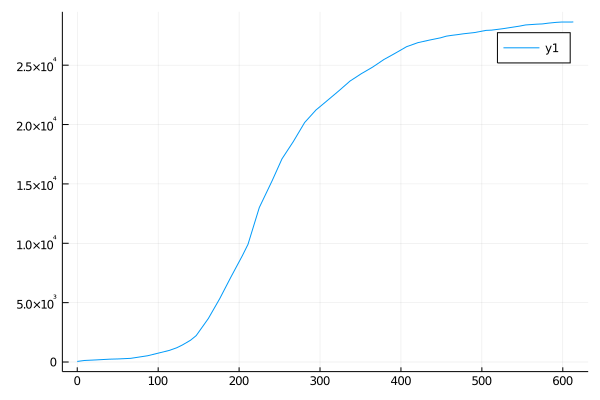

In [4]:
plot(epidays, allcases)

Hm, not too bad! Good choice of scale for the two axes. A light blue for the curve is not that readable for some people, but it looks pretty. The default is to show a legend but not title or axis labels.

Plots lives up to its billing---simple to use, good pictures produced.

<h2>Tweak the current plot</h2>

We choose different attributes by specifying the values of keywords. Plots provides many ways to do this, but I'll show only a few. For more information, see the Plots homepage https://juliaplots.github.io/ .

I think the plot would be better if it used symbols for the data points. Let's also omit the line. That means the line type is set to "scatter". The keyword for the symbol that is plotted is "marker", and I  choose "diamond" as its value. Note the use of the colon in the syntax below!

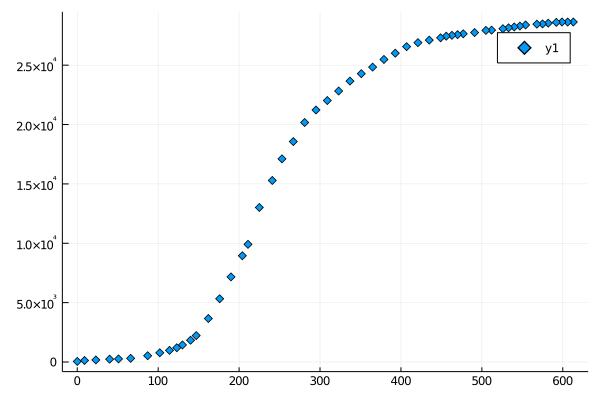

In [5]:
plot(epidays, allcases, linetype = :scatter, marker = :diamond)

We should also add a title and axis labels, and while we're at it turn off the legend. For illustration, I also change the line type and line style so that a gray dotted line is plotted between the diamonds, tur the grid off and  increase the size of the diamonds.

For the long command that results, it is a good idea to use white space to break it into logical parts. Note that although visually it looks like several lines, it is just one function call and so in the sense of computer programming it is just one unit of code.

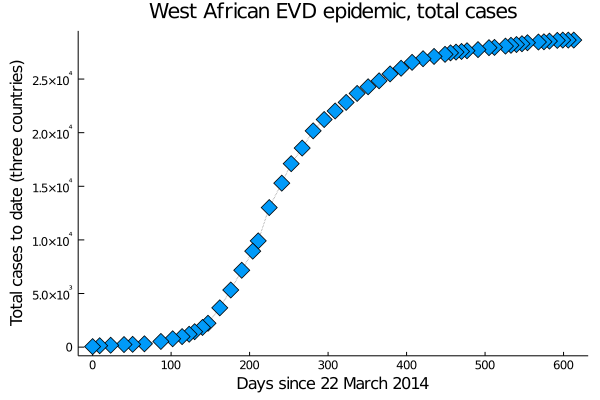

In [6]:
plot(epidays, allcases,   # here are the data to be plotted, below are the attributes
title       = "West African EVD epidemic, total cases", 
xlabel    = "Days since 22 March 2014",
ylabel    = "Total cases to date (three countries)",
marker  = (:diamond, 8),  # note the use of  parentheses to group the marker attributes into a composite of attributes 
line         = (:path, :dot, :gray),   # line attributes likewise put together as one unit by the use of parantheses
legend   = false,
grid        = false)    

# A nice thing: this layout permits us add comments to individual parts of  the function call. 
# Also, notice that it helps readibility to line up vertically all the assignment "=" signs

<h2>Save the current plot</h2>

Of course, one needs to be able to save plots from the screen in a format to be used elsewhere. For documents and presentations, pdf is a good format, while for websites .png is often preferred. 

The function to use is savefig(). Plots will follow the extension you provide for the filename. If you omit the filename, the defaults kick in and Plots will use png as the format and add .png as the file extension.

All three cases are illustrated below. After you've saved the figures, check in your folder that they are there and work as advertised!

In [7]:
savefig("WAfricanEVD_noformatspecified")             # no extension, so plot saves it as .png  
savefig("WAfricanEVD.pdf")      # Saved as a pdf
savefig("WAfricanEVD.png")     # Saved png format

# Multiple curves in a single diagram

<h2>Outcome</h2>

After this lecture, you will be able to
- Use "if" to check for and remove non-numerical values in the data
- Plot several data series simultaneously
- Provide different markers and colours for the several data series
- Provide names to use in a legend for the plot

<h2>"if" statements</h2>

The "if" statement, and variations thereof, are one of the most fundamental structures in  any programming language.

Basically, from time to time, a program needs to choose between a path on which to proceed.

The simplest choice is between doing something and doing nothing, which applies to a few of  the data in our West African EVD data set. Let's load it now to illustrate; we slice to show only the last 10 lines, which is where the missing data are. 

In [23]:
EVDdata = readdlm("wikipediaEVDdatesconverted.csv", ',') # again: don't forget the delimiter!
EVDdata[end-9:end, :] # note the use of "end" in the array slicing
#                         ... and that end-9:end is a range with 10 elements

10×9 Array{Any,2}:
 123  1201  672  427  319  249     129     525     224
 114   982  613  411  310  174     106     397     197
 102   779  481  412  305  115      75     252     101
  87   528  337  398  264   33      24      97      49
  66   309  202  281  186   12      11      16       5
  51   260  182  248  171   12      11        "–"     "–"
  40   239  160  226  149   13      11        "-"     "-"
  23   176  110  168  108    8       2        "–"     "–"
   9   130   82  122   80    8       2        "–"     "–"
   0    49   29   49   29     "–"     "–"     "–"     "–"

We see that some of  them are not numbers. The last four columns (check the Wikipedia page again to confirm) are for Liberia and Sierra Leone. The absent data are because the first cases in those countries were reported after 22 March 2014.

We would like to change them. First let's look at "if" statements, via some examples

In [24]:
a = rand()
println("a now has the value $a")
if a > 0.5
    println("this is quite a large value")
end 

a now has the value 0.24463417265061027


In [25]:
# let's run this through a for loop to see it many times
# NB! Note the  use of indentation to mark the start and end of the for and if structures
for k = 1:8
   a = rand()
   println("a now has the value $a")
   if a > 0.5
      println("this is quite a large value")
   end 
end

a now has the value 0.4297321069880944
a now has the value 0.6881504280867266
this is quite a large value
a now has the value 0.645581880826871
this is quite a large value
a now has the value 0.5560009163452506
this is quite a large value
a now has the value 0.07415539217446976
a now has the value 0.27194392911924603
a now has the value 0.3788514883383942
a now has the value 0.18749369818703343


<h2>Using "for" and "if" to fill in missing data</h2>

Now we loop over *all* the data values. We use the function isnumber() to test whether the data value can be read as a number. This function returns either "true" or "false", so it is perfect for an "if" test.

And of course, whenever "isnumber(element)" evaluates to "false", we must replace the element with a number. I choose 0 as the replacement, but other choices also work (notably "NaN"). Note also that isnumber() as a test only works if the argument is a string. Since any string converts to a string, we can safely use the function string() to convert the numbers to strings before we test with isnumber.

In [26]:
rows, cols = size(EVDdata)  # size() is a very useful function ... look it up with "? size"
for j = 1:cols
    for i = 1:rows   # this order goes does one column at a time
       if !isdigit(string(EVDdata[i, j])[1])  # remember that "!" is the NOT operator (week 1, lecture 5)
         EVDdata[i,j] = 0
       end
   end
end

Let's check those last few rows to see how  it worked:

In [27]:
EVDdata[end-9:end, :]

10×9 Array{Any,2}:
 123  1201  672  427  319  249  129  525  224
 114   982  613  411  310  174  106  397  197
 102   779  481  412  305  115   75  252  101
  87   528  337  398  264   33   24   97   49
  66   309  202  281  186   12   11   16    5
  51   260  182  248  171   12   11    0    0
  40   239  160  226  149   13   11    0    0
  23   176  110  168  108    8    2    0    0
   9   130   82  122   80    8    2    0    0
   0    49   29   49   29    0    0    0    0

<h2>Plotting the different countries' data simultaneously</h2>

This is rather easy. We provide a first series for the x-values (namely the  series epidays) and then we extract as an array the three columns with the individual countries. The plot is then a really simple function statement---that's the beauty of Plots.

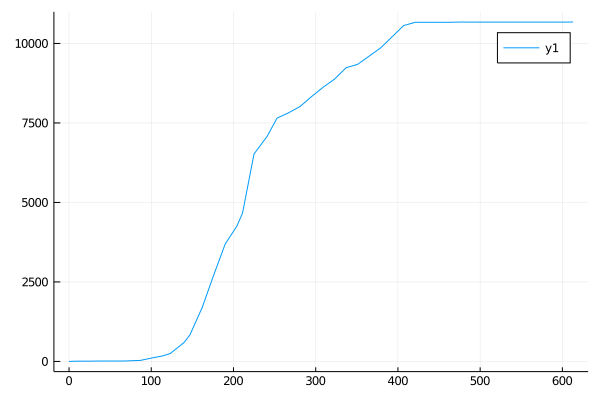

In [28]:
epidays = EVDdata[:,1]
EVDcasesbycountry = EVDdata[:, 6]

using Plots
gr()
plot(epidays, EVDcasesbycountry )

<h2>Customising the simultanenous plot</h2>

The plot above is already fairly useful, but a better legend would help, and again I would prefer to be reminded that the data is only for every week or so, sometimes even less often. Title and axis labels are needed also. In this case perhaps the grid lines will also help to read the plot.

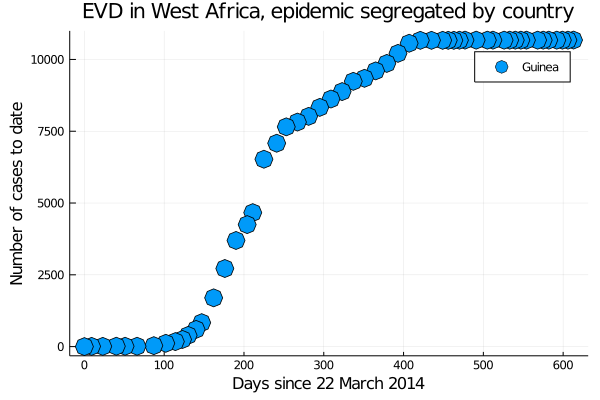

In [29]:
plot(epidays, EVDcasesbycountry,
marker = ([:octagon :star7 :square], 9),
label     = ["Guinea" "Liberia" "Sierra Leone"],
title      = "EVD in West Africa, epidemic segregated by country",
xlabel   = "Days since 22 March 2014",
ylabel   = "Number of cases to date",
line = (:scatter)
)



Ooops! The legend covers up part of the plot.

It can be tricky to place legends. Sometime, as here, one can specify a different position inside to plot area. Alternatively, a slightly transparent legend will show that the plot continues as expected below it (this is done by specifying an alpha level smaller than 1; look at the Plots website for details). Legends outside the plot area are also used.

The option "topleft" (again, note the use of ":" to show it is a value of an attribute) will do nicely, we have to pass it to the keyword "legend", see below:

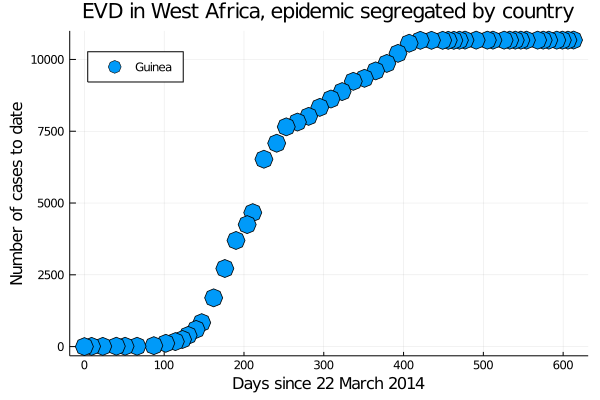

In [30]:
plot(epidays, EVDcasesbycountry,
legend = :topleft,
marker = ([:octagon :star7 :square], 9),
label     = ["Guinea" "Liberia" "Sierra Leone"],
title      = "EVD in West Africa, epidemic segregated by country",
xlabel   = "Days since 22 March 2014",
ylabel   = "Number of cases to date",
line = (:scatter)
)



And why not save the plot?

In [31]:
savefig("L5testfig.pdf")

In [40]:

using Plots

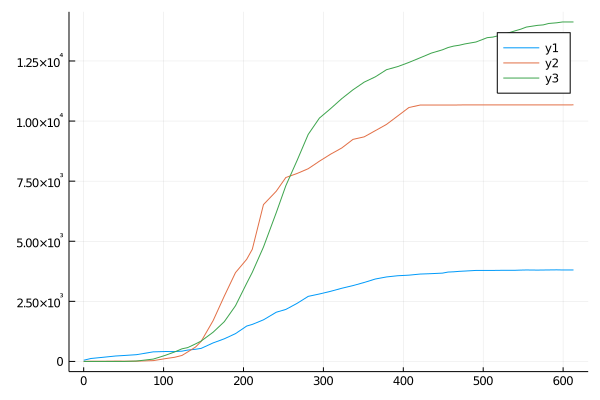

In [44]:
p = plot()
for c in eachcol(EVDdata[:, [4, 6, 8]])
    plot!(p, epidays, c)
end
display(p)

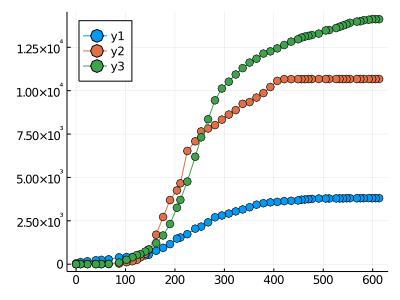

In [74]:
p = plot()
for c in eachcol(EVDdata[:, [4, 6, 8]])
    plot!(p, legend = :topleft, marker = ([:octagon :star7 :square]), epidays, c)
end
display(p)

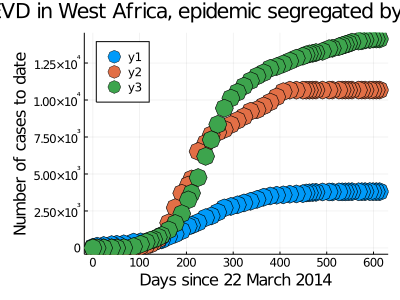

In [70]:
p = plot()
for c in eachcol(EVDdata[:, [4, 6, 8]])
    plot!(p, legend = :topleft, marker = ([:octagon :star7 :square], 9), title  = "EVD in West Africa, epidemic segregated by country", xlabel   = "Days since 22 March 2014", ylabel = "Number of cases to date", line = (:scatter),  epidays, c)
end
display(p)

In [67]:
using StatsPlots # no need for `using Plots` as that is reexported here
gr()

Plots.GRBackend()

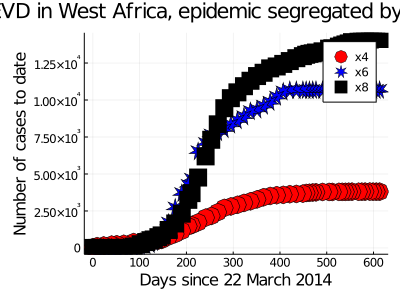

In [75]:
using DataFrames, IndexedTables
df = DataFrame(EVDdata)
@df df plot(:x1, [:x4 :x6 :x8], marker = ([:octagon :star7 :square], 9),
title      = "EVD in West Africa, epidemic segregated by country",
xlabel   = "Days since 22 March 2014",
ylabel   = "Number of cases to date",
line = (:scatter), colour = [:red :blue :black])



# Practice Quiz

<h2 id="int"> Question 1      </h2>

Assume that the Plots package is installed and runs properly. (JuliaBox has the Plots package installed by default). Select all of the following that are true about using the Plots package in the current workspace?


a. The plots produced by the following command will always look the same no matter whether Plots is using PyPlot, PlotlyJS, Gadfly or any of the other backends that work with Plots.

#### x and y are vectors of the same length both containing numbers

plot(x,y)


b. After loading the Plots package you can specify which 'backend' to use to generate plots:

using Plots

gr() #### Activate the GR backend for use with Plots


c. In order to use the Plots package, you have first to execute the line

using Plots


d. You can execute the following as many times as you like during a Julia session without producing an error.
   
  using Plots
  
  using Plots







Double-click __here__ for the solution.

<!-- Your answer is below:

Answer: B, C and D 
--> 

<h2 id="int"> Question 2      </h2> 

The following Julia code defines the function f for a parabola. The 'for' loop prints the x and f(x) for the integers in the range -5 to 5. Lastly a plot is generated of the parabola. The basic notation is: plot(my_function, from, to)

f(x) = 3 * x^2 + 6 * x - 9
for x = -5:5    
  println("(",x, ", ", f(x), ")")
end
using Plots
gr() # Activate the GR backend for use with Plots
plot(f, -4, 3) # plot f over [-4,4]
plot!(zero, -4, 3)
By executing the above code, following what it does and then looking at the output, identify one of the roots of the above function 

f(x)=3∗x^2+6∗x−9

That is, respond below with a single number that is a x-value where f(x) is equal to zero. It should be straightforward to confirm this from either the data coordinates or the plot in the above code.




Double-click __here__ for the solution.

<!-- Your answer is below:
f(x) = 3 * x^2 + 6 * x - 9
for x = -5:5    
  println("(",x, ", ", f(x), ")")
end
using Plots
gr() # Activate the GR backend for use with Plots
plot(f, -4, 3) # plot f over [-4,4]
plot!(zero, -4, 3)
(-5, 36)
(-4, 15)
(-3, 0)
(-2, -9)
(-1, -12)
(0, -9)
(1, 0)
(2, 15)
(3, 36)
(4, 63)
(5, 96)    

Answer: 1 
--> 

<h2 id="int"> Question 3      </h2> 

Given the following array with 15 rows and 2 columns. The two the columns represent the x-values and y-values that we wish to plot.

data = [1.6800483  -1.641695388; 
        0.501309281 -0.977697538; 
        1.528012113 0.52771122;
        1.70012253 1.711524991; 
        1.992493625 1.891000015;
        2.706075824 -0.463427794;
        2.994931927 -0.443566619;
        3.491852811 -1.275179133;
        3.501191722 -0.690499597;
        4.459924502 -5.516130799;
        4.936965851 -6.001703074;
        5.023289852 -8.36416901;
        5.04233698 -7.924477517;
        5.50739285 -10.77482371;
        5.568665171 -10.9171878]
                
The command to create a scatter plot (with no legend) is

plot(x, y, linetype = :scatter, leg = false)

What must x and y be assigned to create a scatter plot using the following command?

using Plots
gr() # Activate the GR backend for use with Plots
#### Use the data array to assign values for x and y here
plot(x, y, linetype = :scatter, leg = false) 
#### scatter(x, y) # this is an alternative method, but does make a legend



a. x,y = data[:,1] , data[:,2]

b. x = data[:,1] ; y = data[1,2]

c. x,y = data[:,1] ; data[:,2]

d. x,y = data[:,2] , data[:,1]

Double-click __here__ for the solution.

<!-- Your answer is below:
x,y = data[:,1] , data[:,2]
Answer: A 
--> 

<h2 id="int"> Question 4     </h2> 

Which line of Julia code plots the array yvals on the y-axis against the array xvals on the x-axis?


a. plot(xvals, 0, yvals)

b. plot(yvals, xvals)

c. plot(xvals : yvals)

d. plot(xvals, yvals)

Double-click __here__ for the solution.

<!-- Your answer is below:
plot(xvals, yvals)
Answer: D 
--> 

<h2 id="int"> Question 5     </h2>

The keyword “line” deals with which property of a plot?

a. The title of the plot

b. The shape and appearance of symbols at datapoints

c. The shape and appearance of the plot line

d. The shape and appearance of the axis line




Double-click __here__ for the solution.

<!-- Your answer is below:
Answer: C 
--> 

<h2 id="int"> Question 6     </h2>

Assume there is an array testArray which has with 20 elements. Then how many elements will be in the array returned by executing the following?

testArray[end-3:end]

Double-click __here__ for the solution.

<!-- Your answer is below:
Answer: 4 
--> 

 <h2 id="int"> Question 7      </h2>
 
If you are using Plots, then the lines below create a scatterplot with a legend.

n = 20

x = sort(rand(20)); y = rand(20)

Plots.scatter(x, y)

Which of the commands below will replace it with a line plot that has no legend, and has the title "A sample plot"? That is the scatterplot and line plot are displayed togeter.

a. plot!(x,y, legend(false), title = "A sample plot)

b. plot!(x,y, title = "A sample plot")

c. plot!(x,y, leg=false, title = "A sample plot")

d. plot(x,y, leg=false, title = "A sample plot")

Double-click __here__ for the solution.

<!-- Your answer is below:
n = 20
x = sort(rand(20)); y = rand(20)
Plots.scatter(x, y)
plot!(x,y, leg=false, title = "A sample plot")

Answer: C 
--> 